In [1]:
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
import numpy as np
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree
import pandas as pd


In [2]:
Num = 3
res_wet = pd.read_csv('conus_ch4_wet.csv')
N_wet_Means = res_wet.N.as_matrix()[[0,1,2]]
A_wet_Means = res_wet.A.as_matrix()[[0,1,2]]
E_wet_Means = res_wet.E.as_matrix()[[0,1,2]]
D_wet_Means = res_wet.D.as_matrix()[[0,1,2]]
P_wet_Means = res_wet.P.as_matrix()[[0,1,2]]
O_wet_Means = res_wet.O.as_matrix()[[0,1,2]]

res_dry = pd.read_csv('conus_ch4_dry.csv')
N_dry_Means = res_dry.N.as_matrix()[[0,1,2]]
A_dry_Means = res_dry.A.as_matrix()[[0,1,2]]
E_dry_Means = res_dry.E.as_matrix()[[0,1,2]]
D_dry_Means = res_dry.D.as_matrix()[[0,1,2]]
P_dry_Means = res_dry.P.as_matrix()[[0,1,2]]
O_dry_Means = res_dry.O.as_matrix()[[0,1,2]]

res_soil = pd.read_csv('conus_ch4_wetsoil.csv')
D_ws_Means = res_soil.D.as_matrix()[[0,1,2]]
D_ds_Means = D_dry_Means - D_ws_Means
# Currently we don't show the standard deviation
#sourceStd = res.CH4_source.as_matrix()[[1,3,5]]
#oxidStd = res.CH4_oxidation.as_matrix()[[1,3,5]]
#sinkStd = res.CH4_sink.as_matrix()[[1,3,5]]
#netStd = res.CH4_net.as_matrix()[[1,3,5]]
#prodStd = res.CH4_prod.as_matrix()[[1,3,5]]

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .value

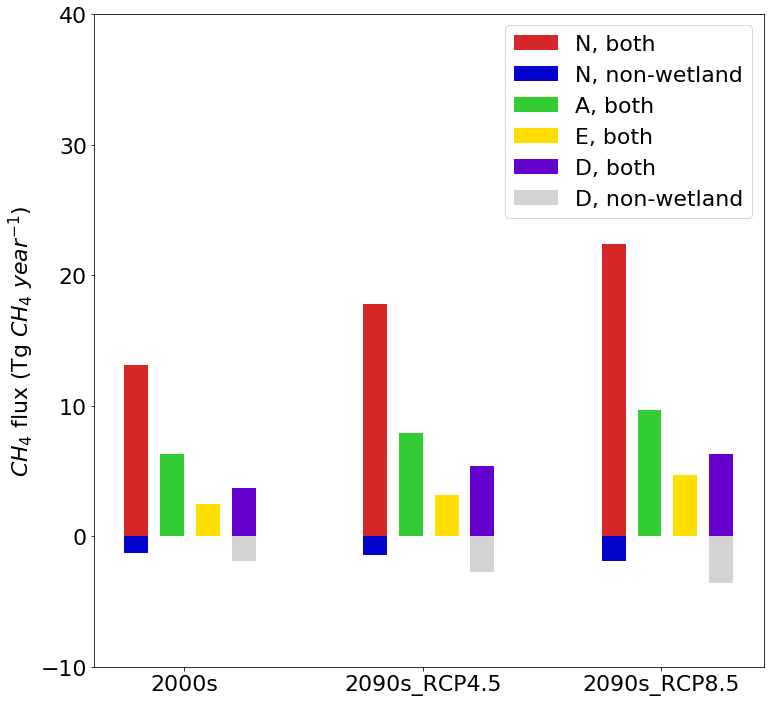

In [3]:
# Read in mean and std for all 4 fluxes and plot the bar chart
# a stacked bar plot with errorbars
fig = plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 22})
ind = np.arange(Num)    # the x locations for the groups
width = 0.1       # the width of the bars: can also be len(x) sequence


p1 = plt.bar(ind+0.3, N_wet_Means, width, color='#d62728', bottom=N_dry_Means)#, yerr=sourceStd)
p2 = plt.bar(ind+0.3, N_dry_Means, width, color='#0304cc', linewidth=3)#, yerr=womenStd)

p3 = plt.bar(ind+0.45, A_wet_Means, width, color='#32CD32')#, yerr=sinkStd) #bottom=menMeans, yerr=womenStd)
#p4 = plt.bar(ind+0.45, A_dry_Means, width, color='#D3D3D3', bottom=A_wet_Means)#, yerr=womenStd)

p5 = plt.bar(ind+0.6, E_wet_Means, width, color='#FFDF00')#, yerr=netStd) #bottom=menMeans, yerr=womenStd)
#p6 = plt.bar(ind+0.6, E_dry_Means, width, color='#8B008B', bottom=E_wet_Means)#, yerr=womenStd)

p7 = plt.bar(ind+0.75, D_wet_Means, width, color='#6600cc', bottom=D_dry_Means)#, yerr=oxidStd) #bottom=menMeans, yerr=womenStd)
p8 = plt.bar(ind+0.75, D_dry_Means, width, color='#D3D3D3')#, yerr=prodStd) #bottom=menMeans, yerr=womenStd)

#distance = [1,3,7,9]
#energy = [10,20,30,40]
#sigma = [1,3,2,5]

#plt.errorbar(distance, 
#    energy, 
#    sigma, 
#    capsize=5, 
#    elinewidth=2,
#    markeredgewidth=2)
axes = plt.gca()
axes.set_ylim([-10,40])

plt.ylabel('$CH_4$ flux (Tg $CH_4$ $year^{-1}$)')
# plt.title('Scores by group and gender')
plt.xticks(ind+0.5, ('2000s', '2090s_RCP4.5', '2090s_RCP8.5'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p5[0], p7[0], p8[0]), ('N, both', 'N, non-wetland', 
                                                        'A, both', 'E, both', 'D, both', 'D, non-wetland'))

plt.show()
#plt.savefig('./fig6.png')

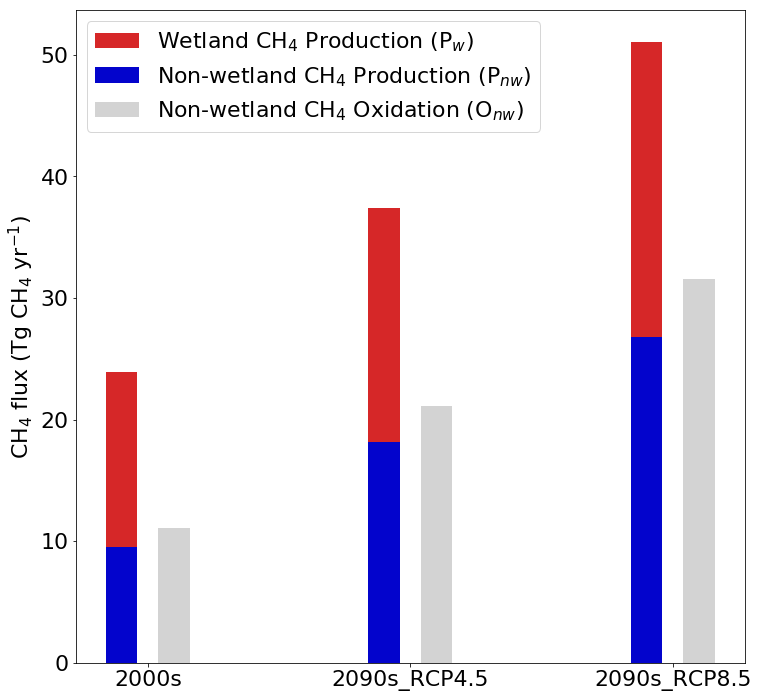

In [5]:
# Read in mean and std for all 4 fluxes and plot the bar chart
# a stacked bar plot with errorbars
fig = plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 22})
ind = np.arange(Num)    # the x locations for the groups
width = 0.12       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind+0.4, P_wet_Means, width, color='#d62728', bottom=P_dry_Means, linewidth=3)#, yerr=sourceStd)
p2 = plt.bar(ind+0.4, P_dry_Means, width, color='#0304cc')#, yerr=womenStd)

p3 = plt.bar(ind+0.6, O_wet_Means, width, color='#32CD32')#, yerr=sinkStd) #bottom=menMeans, yerr=womenStd)
p4 = plt.bar(ind+0.6, O_dry_Means, width, color='#D3D3D3', bottom=O_wet_Means)#, yerr=womenStd)

#distance = [1,3,7,9]
#energy = [10,20,30,40]
#sigma = [1,3,2,5]

#plt.errorbar(distance, 
#    energy, 
#    sigma, 
#    capsize=5, 
#    elinewidth=2,
#    markeredgewidth=2)

plt.ylabel('CH$_4$ flux (Tg CH$_4$ yr$^{-1}$)')
# plt.title('Scores by group and gender')
plt.xticks(ind+0.5, ('2000s', '2090s_RCP4.5', '2090s_RCP8.5'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p4[0]), ('Wetland CH$_{4}$ Production (P$_{w}$)', 'Non-wetland CH$_{4}$ Production (P$_{nw}$)', 'Non-wetland CH$_{4}$ Oxidation (O$_{nw}$)'))


#plt.show()
plt.savefig('./figs2.png')

In [ ]:
# Read in mean and std for all 4 fluxes and plot the bar chart
# a stacked bar plot with errorbars
fig = plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 22})
ind = np.arange(Num)    # the x locations for the groups
width = 0.1       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind+0.35, D_ws_Means, width, color='#d62728', linewidth=3)#, yerr=sourceStd)
p2 = plt.bar(ind+0.65, D_ds_Means, width, color='#0304cc')#, yerr=womenStd)


#distance = [1,3,7,9]
#energy = [10,20,30,40]
#sigma = [1,3,2,5]

#plt.errorbar(distance, 
#    energy, 
#    sigma, 
#    capsize=5, 
#    elinewidth=2,
#    markeredgewidth=2)

axes = plt.gca()
axes.set_ylim([-6,2])

plt.ylabel('$CH_4$ flux (Tg $CH_4$ $year^{-1}$)')
# plt.title('Scores by group and gender')
plt.xticks(ind+0.5, ('2000s', '2090s_RCP4.5', '2090s_RCP8.5'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('D, wet soil', 'D, dry soil'))

#plt.show()
plt.savefig('./fig6a.png')


In [ ]:
D_ws_Means